## Idiomatyczne rozwiązanie w Pythonie

W klasycznym wzorcu Strategia tworzymy interfejs i wiele klas implementujących różne strategie. W Pythonie możemy to radykalnie uprościć, wykorzystując **funkcje jako obiekty pierwszej klasy**.

### Co to oznacza?

W Pythonie funkcje są pełnoprawnymi obiektami - możemy je przypisywać do zmiennych, przekazywać jako argumenty i zwracać z innych funkcji. To znaczy, że **zamiast tworzyć klasę dla każdej strategii, wystarczy zwykła funkcja**.

### Porównanie

**Klasyczny wzorzec** (jak wyżej):
- Interfejs `IFlyable`
- Klasy `FlyWithWings`, `FlyNoWay` etc.

**Pythoniczny idiom**:
- Po prostu funkcje


In [4]:
# Idiomatyczny Python - strategie jako funkcje

# Strategie latania - zwykłe funkcje
def fly_with_wings():
    print("Latam")

def fly_no_way():
    print("Nie robię nic")


# Strategie kwakania - zwykłe funkcje
def quack():
    print("Kwa kwa")

def squeak():
    print("Piszczę")

def silence():
    print("Nie robię nic")


# Kaczka przyjmuje funkcje jako argumenty
class Duck:
    def __init__(self, fly_strategy, quack_strategy):
        # Przechowujemy funkcje jako atrybuty
        self.fly_strategy = fly_strategy
        self.quack_strategy = quack_strategy

    def perform_fly(self):
        # Wywołujemy funkcję-strategię
        self.fly_strategy()

    def perform_quack(self):
        self.quack_strategy()

In [5]:
# Użycie - po prostu przekazujemy funkcje

# Dziką kaczkę tworzymy ze strategiami "lata ze skrzydłami" i "kwacze"
wild_duck = Duck(fly_strategy=fly_with_wings, quack_strategy=quack)
wild_duck.perform_fly()
wild_duck.perform_quack()

print()

# Gumową kaczkę ze strategiami "nie lata" i "piszczy"
rubber_duck = Duck(fly_strategy=fly_no_way, quack_strategy=squeak)
rubber_duck.perform_fly()
rubber_duck.perform_quack()

Latam
Kwa kwa

Nie robię nic
Piszczę


In [6]:
# Dynamiczną zmiana strategii - też bardzo prosta!

duck = Duck(fly_strategy=fly_with_wings, quack_strategy=quack)

print("Przed strzałem:")
duck.perform_fly()

# Myśliwy przestrzelił skrzydło - zmieniamy strategię
duck.fly_strategy = fly_no_way

print("\nPo strzale:")
duck.perform_fly()

Przed strzałem:
Latam

Po strzale:
Nie robię nic


### Co się tutaj stało?

**Zastosowaliśmy idiom Pythona**: funkcje jako obiekty pierwszej klasy

**Co zyskaliśmy?**
- **Brak hierarchii klas** - nie potrzeba interfejsów `IFlyable`, `IQuackable`
- **Brak boilerplate** - nie trzeba pisać `__init__`, `pass`, `abc.abstractmethod`
- **Równie elastyczne** - dynamiczna zmiana strategii działa tak samo
- **Bardziej czytelne** - od razu widać co robi strategia

**Kiedy użyć klasycznego wzorca w Pythonie?**
- Gdy strategia potrzebuje stanu (atrybutów)
- Gdy strategia ma wiele powiązanych metod
- Gdy potrzebujesz dziedziczenia między strategiami

**Kiedy użyć funkcji (idiom)?**
- Gdy strategia to **jedna operacja bez stanu** ← większość przypadków!
- Gdy chcesz prosty, czytelny kod

### Bonus: lambda i funkcje wbudowane

Jeśli strategia jest bardzo prosta, możemy użyć lambd lub funkcji wbudowanych:

In [7]:
# Przykład z przetwarzaniem danych
# Ogólna funkcja przjmująca dane i strategię ich obróbki
def process_data(data, strategy):
    """Przetwarza dane używając podanej strategii"""
    return strategy(data)

# Strategie jako funkcje wbudowane
result1 = process_data("hello", str.upper)
print(result1)  # HELLO

result2 = process_data("hello", str.capitalize)
print(result2)  # Hello

# Strategie jako lambdy
result3 = process_data("hello", lambda x: x[::-1])
print(result3)  # olleh

# Strategie jako własne funkcje
def add_exclamation(text):
    return text + "!"

result4 = process_data("hello", add_exclamation)
print(result4)  # hello!

HELLO
Hello
olleh
hello!


To jest esencja różnicy między **wzorcem projektowym** a **idiomem języka**:
- **Wzorzec** = uniwersalne rozwiązanie, działa wszędzie (Java, C++, Python)
- **Idiom** = wykorzystuje unikalne cechy Pythona (funkcje jako obiekty) dla prostszego kodu

W Pythonie **wzorzec Strategia często nie jest potrzebny** - wystarczą funkcje!

## Przykład wykorzystania wzorca strategia w Pythonie

### 1. strategie serializacji JSON

`json.dumps(data, cls=...)`

Python potrafi serializować dane do jsona z automatu

In [11]:
import json

data = {
    "name": "John",
    "age": 30,
    "is_active": True
}

json.dumps(data)

'{"name": "John", "age": 30, "is_active": true}'

Ale domyślna strategia serializacji obsługuje tylko kilka podstawowych typów. Spróbujmy z czymś mniej typowym, np. obiekt klasy `datatime`.

In [12]:
from datetime import datetime

data = {
    'timestamp': datetime(2024, 1, 15, 14, 30, 0)
}

json.dumps(data)

TypeError: Object of type datetime is not JSON serializable

Co w takiej sytuacji?

Zróbmy przykład z większą liczbą nieobsługiwanych typów - `datatime`, `date`, `Decimal`.

In [13]:
import json
from datetime import datetime, date
from decimal import Decimal

# Dane do serializacji
data = {
    'timestamp': datetime(2024, 1, 15, 14, 30, 0),  # nieobsługiwane przez domyślną strategię serializacji
    'date': date(2024, 1, 15),  # nieosbsługiwane przez domyślną strategię serializacji
    'amount': Decimal('123.45'),  # nieobsługiwane przez domyślną strategię serializacji
    'name': 'Test'
}
print("Dane do serializacji:", data)

# Domyślna strategia - zawiedzie dla datetime/date/Decimal
json.dumps(data)

Dane do serializacji: {'timestamp': datetime.datetime(2024, 1, 15, 14, 30), 'date': datetime.date(2024, 1, 15), 'amount': Decimal('123.45'), 'name': 'Test'}


TypeError: Object of type datetime is not JSON serializable

Żeby zserializować dane o nieobsługiwanych typach musimy stworzyć własną strategię serializacji, tutaj nazywaną **encoderem**.

In [15]:
# Strategia 1: Custom encoder dla datetime, date i Decimal
class DateTimeEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, datetime):
            return obj.strftime('%Y-%m-%d %H:%M:%S')
        elif isinstance(obj, date):
            return obj.strftime('%Y-%m-%d')
        elif isinstance(obj, Decimal):
            return float(obj)
        return super().default(obj)

In [16]:
result1 = json.dumps(data, cls=DateTimeEncoder)
print("\nStrategia DateTimeEncoder:\n\n", result1)


Strategia DateTimeEncoder:

 {"timestamp": "2024-01-15 14:30:00", "date": "2024-01-15", "amount": 123.45, "name": "Test"}


Oczywiście możemy stworzyć kilka różnych strategii.

In [17]:
# Strategia 2: ISO format encoder  
class ISOEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, (datetime, date)):
            return obj.isoformat()
        elif isinstance(obj, Decimal):
            return str(obj)  # Zachowaj precyzję jako string
        return super().default(obj)

In [18]:
result2 = json.dumps(data, cls=ISOEncoder)
print("\nStrategia ISOEncoder:\n\n", result2)


Strategia ISOEncoder:

 {"timestamp": "2024-01-15T14:30:00", "date": "2024-01-15", "amount": "123.45", "name": "Test"}


In [19]:
# Strategia 3: Timestamp encoder
class TimestampEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, datetime):
            return obj.timestamp()
        elif isinstance(obj, date):
            return datetime.combine(obj, datetime.min.time()).timestamp()
        elif isinstance(obj, Decimal):
            return float(obj)
        return super().default(obj)

In [50]:
result3 = json.dumps(data, cls=TimestampEncoder) 
print("Strategia TimestampEncoder:", result3)

Strategia TimestampEncoder: {"timestamp": 1705325400.0, "date": 1705273200.0, "amount": 123.45, "name": "Test"}


In [20]:
# Demonstracja: różne strategie, różne wyniki
print("\nPorównanie wyników:\n\n")
print("DateTimeEncoder: datetime jako string")  
print("ISOEncoder: datetime jako ISO format")
print("TimestampEncoder: datetime jako Unix timestamp\n")


Porównanie wyników:


DateTimeEncoder: datetime jako string
ISOEncoder: datetime jako ISO format
TimestampEncoder: datetime jako Unix timestamp



Pomiędzy tym rozwiązaniem, a wzorcem strategii istnieje tylko jedna niewielka różnica - nadklasa wszystkich strategii jest konkretną klasą z konkretną, domyślna implementacją metody dziedziczonej przez wszystkie strategie. Innymi słowy w rodzinie klas strategii nie ma zdefiniowanego interfejsu. Jest to o tyle pomijalne, że Python jest językiem polimorficznym i dlatego nie wymaga definiowania interfejsów. Jedynie kod jest nieco mniej samodokumentujący.

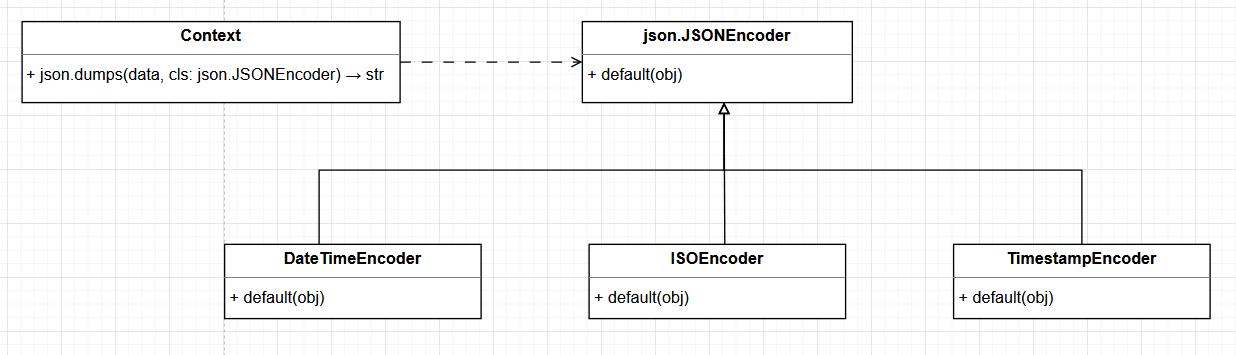

### Różne strategie sortowania

`sorted(key=...)`

Ten przykład prezentuje wykorzystanie w kodzie pythona idomatycznej wersji wzorca (strategie jako pierwszo-klasowe funkcje).

In [22]:
# Dataset do sortowania
students = [
    {'name': 'Anna', 'grade': 85, 'age': 20},
    {'name': 'Jan', 'grade': 92, 'age': 19}, 
    {'name': 'Ewa', 'grade': 78, 'age': 21},
    {'name': 'Piotr', 'grade': 88, 'age': 18}
]

In [23]:
# Strategia 1: sortuj po imieniu
def sort_by_name(obj):
    return obj['name']
    
by_name = sorted(students, key=sort_by_name)
print("Po imieniu:", [s['name'] for s in by_name])

Po imieniu: ['Anna', 'Ewa', 'Jan', 'Piotr']


In [24]:
# Strategia 2: sortuj po ocenie (malejąco)
def sort_by_grade(obj):
    return obj['grade']
    
by_grade = sorted(students, key=sort_by_grade, reverse=True)
print("Po ocenie:", [(s['name'], s['grade']) for s in by_grade])

Po ocenie: [('Jan', 92), ('Piotr', 88), ('Anna', 85), ('Ewa', 78)]


Możemy użyć tutaj funkcji anonimowych (lambda)

In [67]:
# Strategia 3: sortuj po wieku
by_age = sorted(students, key=lambda x: x['age'])
print("Po wieku:", [(s['name'], s['age']) for s in by_age])

Po wieku: [('Piotr', 18), ('Jan', 19), ('Anna', 20), ('Ewa', 21)]


In [68]:
# Strategia 4: sortuj po długości imienia
by_name_length = sorted(students, key=lambda x: len(x['name']))
print("Po długości imienia:", [(s['name'], len(s['name'])) for s in by_name_length])

Po długości imienia: [('Jan', 3), ('Ewa', 3), ('Anna', 4), ('Piotr', 5)]


In [69]:
# Strategia kompozytowa: najpierw po ocenie, potem po wieku
by_grade_then_age = sorted(students, key=lambda x: (x['grade'], x['age']), reverse=True)
print("Po ocenie, potem wieku:", [(s['name'], s['grade'], s['age']) for s in by_grade_then_age])

Po ocenie, potem wieku: [('Jan', 92, 19), ('Piotr', 88, 18), ('Anna', 85, 20), ('Ewa', 78, 21)]


In [25]:
# Demonstration: ta sama funkcja, różne algorytmy
words = ['Python', 'java', 'C++', 'javascript']

print("\nTa sama funkcja sorted(), różne strategie:\n")
print("Default:", sorted(words))
print("Case-insensitive:", sorted(words, key=str.lower))
print("By length:", sorted(words, key=len))
print("By last char:", sorted(words, key=lambda x: x[-1]))


Ta sama funkcja sorted(), różne strategie:

Default: ['C++', 'Python', 'java', 'javascript']
Case-insensitive: ['C++', 'java', 'javascript', 'Python']
By length: ['C++', 'java', 'Python', 'javascript']
By last char: ['C++', 'java', 'Python', 'javascript']


**Mapowanie na język wzorca**:
- **Context**: funkcja `sorted()`
- **Strategy**: parametr `key` - funkcja określająca strategię porównywania
- **ConcreteStrategy1**: `lambda x: x['name']` - sortowanie po imieniu
- **ConcreteStrategy2**: `lambda x: x['grade']` - sortowanie po ocenie  
- **ConcreteStrategy3**: `str.lower` - sortowanie case-insensitive
- **ConcreteStrategy4**: `len` - sortowanie po długości
- **Algorithm**: wewnętrzny algorytm sortowania (Timsort)

**Dlaczego to Strategy?**
- ✅ Wymienialność algorytmów w runtime przez parametr `key`
- ✅ Algorytm sortowania jest hermetyzowany w obiekcie funkcji
- ✅ Jednolity interfejs (`key=`) dla różnych strategii
- ✅ Klient wybiera strategię bez zmiany kodu `sorted()`

**Praktyczne znaczenie**:
Umożliwia elastyczne sortowanie według różnych kryteriów bez duplikowania kodu algorytmu sortowania.